# What is Diabetes?
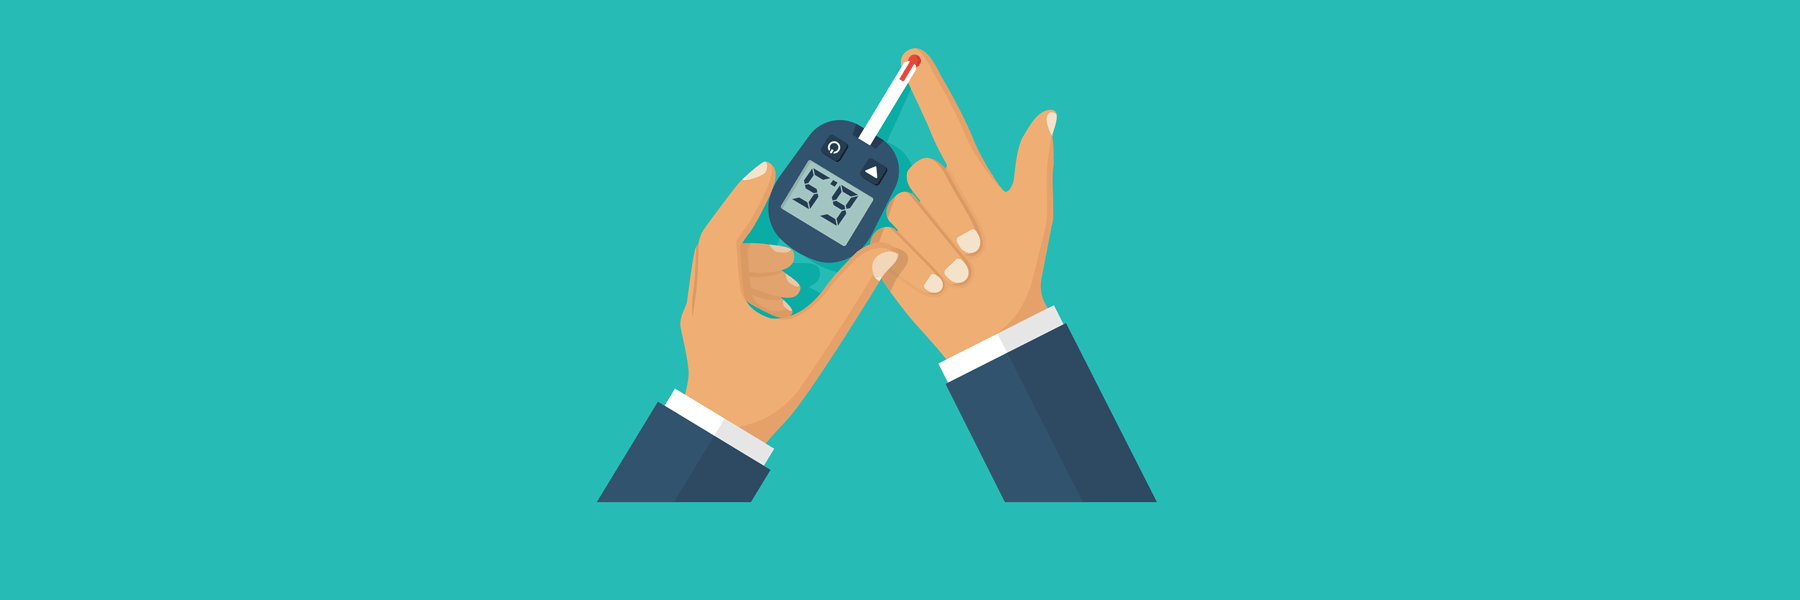

Diabetes is a chronic disease that occurs when the pancreas is no longer able to make insulin, or when the body cannot make good use of the insulin it produces.

Insulin is a hormone made by the pancreas, that acts like a key to let glucose from the food we eat pass from the blood stream into the cells in the body to produce energy. All carbohydrate foods are broken down into glucose in the blood. Insulin helps glucose get into the cells. 

Not being able to produce insulin or use it effectively leads to raised glucose levels in the blood (known as hyperglycaemia). Over the long-term high glucose levels are associated with damage to the body and failure of various organs and tissues.

# Understanding Data

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
data = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes2.csv")

In [ ]:
data.head(10)

In [ ]:
data.columns

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.corr().Outcome.sort_values()

In [ ]:
data.describe().T

# Visualization

In [ ]:
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.corr(), cmap="GnBu", annot=True, linewidths=0.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
# Age Distribution
fig = px.histogram(data, x="Age",
                   marginal="box",
                  )
fig.show()

In [ ]:
sns.countplot(data.Outcome, palette="PRGn")
plt.title("Outcome",fontsize=15)
plt.show()

In [ ]:
# Age distribution by Outcome 0
fig = px.histogram(data, x=data[data.Outcome==0].Age,
                   marginal="box",
                   color_discrete_sequence=['lightgreen']
                  )
fig.show()

In [ ]:
# Age distribution by Outcome 1
fig = px.histogram(data, x=data[data.Outcome==1].Age,
                   marginal="box",
                   color_discrete_sequence=['pink']
                  )
fig.show()

In [ ]:
data.boxplot(figsize=(10,8),column='Pregnancies',by ='Outcome')
plt.show()

In [ ]:
plt.subplots(figsize=(15,10))
sns.boxplot(x='Age', y='BMI', data=data)
plt.show()

# Logistic Regression

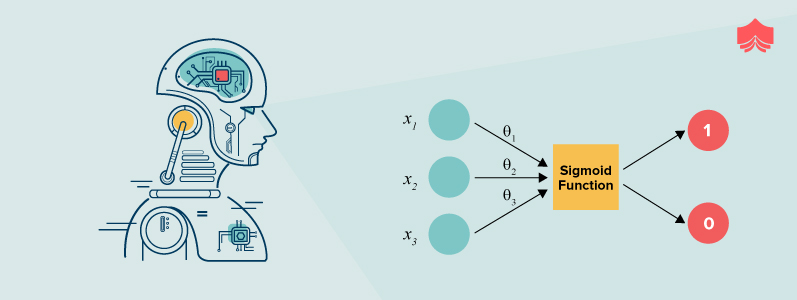

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Like all regression analyzes, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

# Diabetics Prediction Using Logistic Regression 

In [ ]:
x = data.drop(['Outcome'], axis = 1)
y = data.loc[:,"Outcome"].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

In [ ]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(max_iter=150)

In [ ]:
# Fit
logreg.fit(x_train,y_train)

In [ ]:
# Predict
predicted = logreg.predict(x_test)

In [ ]:
print("Test accuracy: {} ".format(logreg.score(x_test, y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,predicted)
cf_matrix

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()